In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect
from sqlalchemy import and_, or_

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
conn = engine.connect()

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
inspector = inspect(engine)

In [11]:
columns = inspector.get_columns("Measurement")
columns2 = inspector.get_columns("Station")
for column in columns:
    print(column["name"], column["type"])
    
print("----------------------")

for column2 in columns2:
    print(column["name"], column2["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT
----------------------
tobs INTEGER
tobs TEXT
tobs TEXT
tobs FLOAT
tobs FLOAT
tobs FLOAT


In [12]:
station_sql = session.query(Station).statement
station_df = pd.read_sql_query(station_sql, session.bind)

In [13]:
testing_sql = session.query(Measurement).filter(Measurement.date >= "2016-08-23").statement

In [14]:
df = pd.read_sql_query(testing_sql, session.bind)
df_clean = df.dropna()
df_clean = df_clean[["date", "prcp"]]
df_clean = df_clean.rename(columns = {"prcp": "Precipitation"})
df_clean = df_clean.sort_values("date", ascending=True)

In [15]:
min(df_clean["date"])

'2016-08-23'

In [16]:
x_axis = df_clean["date"]
y_axis = df_clean["Precipitation"]

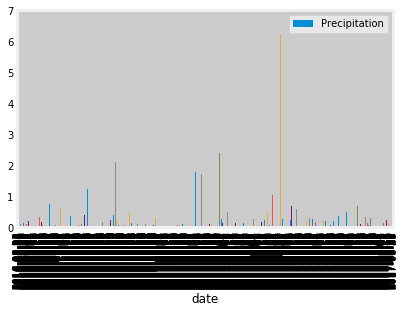

In [18]:
df_clean.plot(kind="bar", x="date", y="Precipitation")
plt.show()

In [137]:
df2 = pd.read_sql_query(testing_sql, session.bind)
# df_clean.sort_values(by="date", ascending=False)

In [160]:
df_clean.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [47]:
# BONUS: Use Pandas `read_sql_query` to load a query statement directly into the DataFrame


,id,station,date,prcp,tobs
19549,19550,USC00516128,2017-08-23,0.45,76.0
7634,7635,USC00514830,2017-08-23,0.00,82.0
2723,2724,USC00519397,2017-08-23,0.00,81.0
12186,12187,USC00519523,2017-08-23,0.08,82.0
2722,2723,USC00519397,2017-08-22,0.00,82.0


# Exploratory Climate Analysis

In [ ]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


![precipitation](Images/precipitation.png)

In [ ]:
# Use Pandas to calcualte the summary statistics for the precipitation data

![describe](Images/describe.png)

In [178]:
# Design a query to show how many stations are available in this dataset?
station_sql = session.query(Station).count()
station_sql

9

In [186]:
station_sql = session.query(Station).statement
station_df = pd.read_sql_query(station_sql, session.bind)
# station_df.groupby("station").value_
station_df

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
5,6,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
6,7,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
7,8,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
8,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


In [251]:
m_sql = session.query(Measurement).statement
measure = pd.read_sql_query(m_sql, session.bind)
measure["station"].value_counts()

USC00519281    2772
USC00519397    2724
USC00513117    2709
USC00519523    2669
USC00516128    2612
USC00514830    2202
USC00511918    1979
USC00517948    1372
USC00518838     511
Name: station, dtype: int64

In [408]:
measure.groupby("station").count().sort_values(by="id", ascending=False)

,id,date,prcp,tobs
station,,,,
USC00519281,2772,2772,2772,2772
USC00519397,2724,2724,2685,2724
USC00513117,2709,2709,2696,2709
USC00519523,2669,2669,2572,2669
USC00516128,2612,2612,2484,2612
USC00514830,2202,2202,1937,2202
USC00511918,1979,1979,1932,1979
USC00517948,1372,1372,683,1372
USC00518838,511,511,342,511


In [249]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
m_df = measure.groupby(["tobs"]).count().sort_values(by="id", ascending=False)

In [236]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
print(measure.max())
print(measure.min())
print(measure.mean())

id               19550
station    USC00519523
date        2017-08-23
prcp             11.53
tobs                87
dtype: object
id                   1
station    USC00511918
date        2010-01-01
prcp                 0
tobs                53
dtype: object
id      9775.500000
prcp       0.160644
tobs      73.097954
dtype: float64


In [285]:
tobs = session.query(Measurement).\
        filter(and_(Measurement.date >="2016-08-23", Measurement.station == "USC00519281")).\
        order_by(Measurement.tobs.desc()).statement
tobs12 = pd.read_sql_query(tobs, session.bind)
tobs12.head()

,id,station,date,prcp,tobs
0,14953,USC00519281,2017-08-06,0.00,83.0
1,14942,USC00519281,2017-07-23,0.20,82.0
2,14948,USC00519281,2017-07-29,0.23,82.0
3,14952,USC00519281,2017-08-05,0.06,82.0
4,14808,USC00519281,2017-03-11,0.01,81.0


In [297]:
tobs_df = tobs12.groupby("tobs").count().sort_values(by="id", ascending=False)
tobs_new = tobs_df.reset_index()
tobs_new.head()

,tobs,id,station,date,prcp
0,74.0,39,39,39,39
1,76.0,33,33,33,33
2,75.0,33,33,33,33
3,77.0,31,31,31,31
4,78.0,22,22,22,22


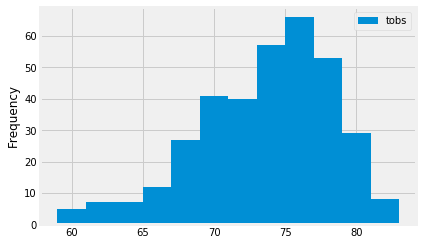

In [344]:
tobs_plot = tobs12["tobs"]
tobs_plot.plot(kind="hist", bins=12, label="tobs")
plt.legend(loc = "upper right")
plt.show()

In [ ]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


![precipitation](Images/station-histogram.png)

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



## Optional Challenge Assignment

In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
